# Riskfolio-Lib Tutorial: 
<br>__[Financionerioncios](https://financioneroncios.wordpress.com)__
<br>__[Orenji](https://www.orenj-i.net)__
<br>__[Riskfolio-Lib](https://riskfolio-lib.readthedocs.io/en/latest/)__
<br>__[Dany Cajas](https://www.linkedin.com/in/dany-cajas/)__
<a href='https://ko-fi.com/B0B833SXD' target='_blank'><img height='36' style='border:0px;height:36px;' src='https://cdn.ko-fi.com/cdn/kofi1.png?v=2' border='0' alt='Buy Me a Coffee at ko-fi.com' /></a> 

## Tutorial 9: Portfolio Optimization with Risk Factors and Principal Components Regression (PCR)

## 1. Downloading the data:

In [1]:
import numpy as np
import pandas as pd
import yfinance as yf
import warnings

warnings.filterwarnings("ignore")

yf.pdr_override()
pd.options.display.float_format = '{:.4%}'.format

# Date range
start = '2016-01-01'
end = '2019-12-30'

# Tickers of assets
assets = ['JCI', 'TGT', 'CMCSA', 'CPB', 'MO', 'APA', 'MMC', 'JPM',
          'ZION', 'PSA', 'BAX', 'BMY', 'LUV', 'PCAR', 'TXT', 'DHR',
          'DE', 'MSFT', 'HPQ', 'SEE', 'VZ', 'CNP', 'NI']
assets.sort()

# Tickers of factors

factors = ['MTUM', 'QUAL', 'VLUE', 'SIZE', 'USMV']
factors.sort()

tickers = assets + factors
tickers.sort()

# Downloading data
data = yf.download(tickers, start = start, end = end)
data = data.loc[:,('Adj Close', slice(None))]
data.columns = tickers

[*********************100%***********************]  28 of 28 completed


In [2]:
# Calculating returns

X = data[factors].pct_change().dropna()
Y = data[assets].pct_change().dropna()

display(X.head())

,MTUM,QUAL,SIZE,USMV,VLUE
Date,,,,,
2016-01-05,0.4735%,0.2672%,0.0000%,0.6779%,0.1635%
2016-01-06,-0.5267%,-1.1914%,-0.5379%,-0.6253%,-1.8277%
2016-01-07,-2.2293%,-2.3798%,-1.7181%,-1.6215%,-2.1609%
2016-01-08,-0.9548%,-1.1377%,-1.1978%,-1.0086%,-1.0873%
2016-01-11,0.6043%,0.1479%,-0.5898%,0.1491%,-0.6183%


## 2. Estimating Mean Variance Portfolios with PCR

### 2.1 Estimating the loadings matrix with PCR.

This part is just to visualize how Riskfolio-Lib calculates a loadings matrix using PCR.

In [3]:
import riskfolio.ParamsEstimation as pe

feature_selection = 'PCR' # Method to select best model, could be PCR or Stepwise
n_components = 0.95 # 95% of explained variance. See PCA in scikit learn for more information

loadings = pe.loadings_matrix(X=X, Y=Y, feature_selection=feature_selection,
                              n_components=n_components)

loadings.style.format("{:.4f}").background_gradient(cmap='RdYlGn')

,const,MTUM,QUAL,SIZE,USMV,VLUE
APA,-0.0006,-0.6192,0.3867,1.0815,-1.1446,1.4586
BAX,0.0003,0.3086,0.1873,0.0778,0.5212,-0.0462
BMY,-0.0003,0.0722,0.1551,0.2642,0.3006,0.1036
CMCSA,0.0001,0.0839,0.1754,0.2745,0.2770,0.1439
CNP,0.0001,-0.2179,-0.0567,0.5712,1.1099,-0.4864
CPB,-0.0003,-0.2112,-0.0894,0.5309,1.1786,-0.5765
DE,0.0005,0.0734,0.3330,0.3330,-0.3679,0.7057
DHR,0.0007,0.4074,0.1571,-0.0081,0.8048,-0.2687
HPQ,0.0002,0.1781,0.3999,0.2718,-0.4664,0.8170
JCI,0.0001,-0.0516,0.2158,0.4060,-0.0666,0.4274


### 2.2 Calculating the portfolio that maximizes Sharpe ratio.

In [4]:
import riskfolio.Portfolio as pf

# Building the portfolio object
port = pf.Portfolio(returns=Y)

# Calculating optimum portfolio

# Select method and estimate input parameters:

method_mu='hist' # Method to estimate expected returns based on historical data.
method_cov='hist' # Method to estimate covariance matrix based on historical data.

port.assets_stats(method_mu=method_mu,
                  method_cov=method_cov)

feature_selection = 'PCR' # Method to select best model, could be PCR or Stepwise
n_components = 0.95 # 95% of explained variance. See PCA in scikit learn for more information

port.factors = X
port.factors_stats(method_mu=method_mu,
                   method_cov=method_cov,
                   feature_selection=feature_selection,
                   n_components=n_components
                  )

# Estimate optimal portfolio:

model='FM' # Factor Model
rm = 'MV' # Risk measure used, this time will be variance
obj = 'Sharpe' # Objective function, could be MinRisk, MaxRet, Utility or Sharpe
hist = False # Use historical scenarios for risk measures that depend on scenarios
rf = 0 # Risk free rate
l = 0 # Risk aversion factor, only useful when obj is 'Utility'

w = port.optimization(model=model, rm=rm, obj=obj, rf=rf, l=l, hist=hist)

display(w.T)

,APA,BAX,BMY,CMCSA,CNP,CPB,DE,DHR,HPQ,JCI,...,MO,MSFT,NI,PCAR,PSA,SEE,TGT,TXT,VZ,ZION
weights,0.0000%,10.0205%,0.0000%,0.0000%,9.4678%,0.0000%,4.4965%,11.5030%,0.0000%,0.0000%,...,0.0000%,13.1970%,9.4209%,0.0000%,0.0000%,0.0000%,4.9689%,0.0000%,5.0518%,0.0000%


### 2.3 Plotting portfolio composition

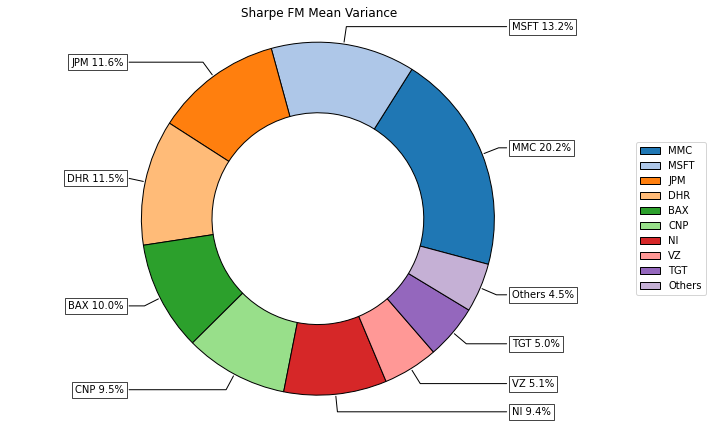

In [5]:
import riskfolio.PlotFunctions as plf

# Plotting the composition of the portfolio

ax = plf.plot_pie(w=w, title='Sharpe FM Mean Variance', others=0.05, nrow=25, cmap = "tab20",
                  height=6, width=10, ax=None)

### 2.3 Calculate efficient frontier

In [6]:
points = 50 # Number of points of the frontier

frontier = port.efficient_frontier(model=model, rm=rm, points=points, rf=rf, hist=hist)

display(frontier.T.head())

,APA,BAX,BMY,CMCSA,CNP,CPB,DE,DHR,HPQ,JCI,...,MO,MSFT,NI,PCAR,PSA,SEE,TGT,TXT,VZ,ZION
0,0.0000%,1.3255%,3.1608%,3.6387%,10.5722%,6.1208%,0.0000%,0.0697%,0.0000%,3.4508%,...,7.8294%,0.0000%,13.4974%,0.0000%,13.1854%,1.6035%,3.4865%,0.0000%,13.5098%,2.8498%
1,0.0000%,6.2313%,0.0000%,2.9116%,12.3730%,3.4578%,1.6000%,4.2174%,0.0000%,1.0180%,...,1.9051%,0.0000%,14.8112%,0.0000%,5.5497%,0.0000%,4.5459%,0.0000%,13.0532%,2.5520%
2,0.0000%,7.7231%,0.0000%,2.1249%,12.8476%,2.1059%,2.3854%,5.8792%,0.0000%,0.0000%,...,0.0000%,1.9487%,15.0777%,0.0000%,1.7456%,0.0000%,4.8427%,0.0000%,12.4839%,2.0118%
3,0.0000%,8.6371%,0.0000%,0.8326%,12.5511%,0.2798%,3.0115%,7.4372%,0.0000%,0.0000%,...,0.0000%,5.0175%,14.3447%,0.0000%,0.0000%,0.0000%,4.9808%,0.0000%,11.1060%,1.3316%
4,0.0000%,9.2855%,0.0000%,0.0000%,11.3450%,0.0000%,3.6998%,9.1497%,0.0000%,0.0000%,...,0.0000%,8.5104%,12.3537%,0.0000%,0.0000%,0.0000%,5.0125%,0.0000%,8.6659%,0.5631%


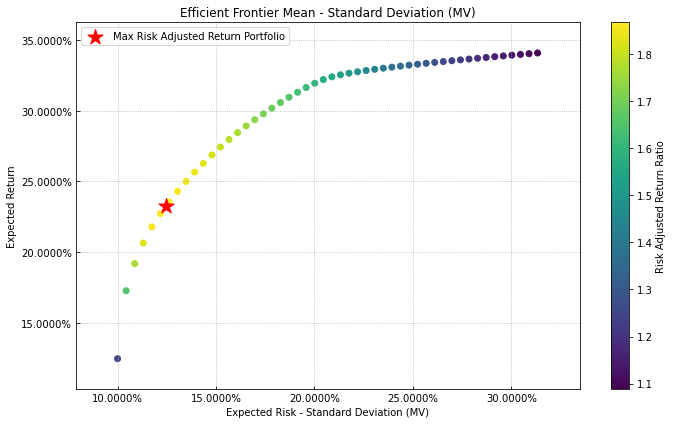

In [7]:
# Plotting the efficient frontier

label = 'Max Risk Adjusted Return Portfolio' # Title of point
mu = port.mu_fm # Expected returns
cov = port.cov_fm # Covariance matrix
returns = port.returns_fm # Returns of the assets

ax = plf.plot_frontier(w_frontier=frontier, mu=mu, cov=cov, returns=returns, rm=rm,
                       rf=rf, alpha=0.01, cmap='viridis', w=w, label=label,
                       marker='*', s=16, c='r', height=6, width=10, ax=None)

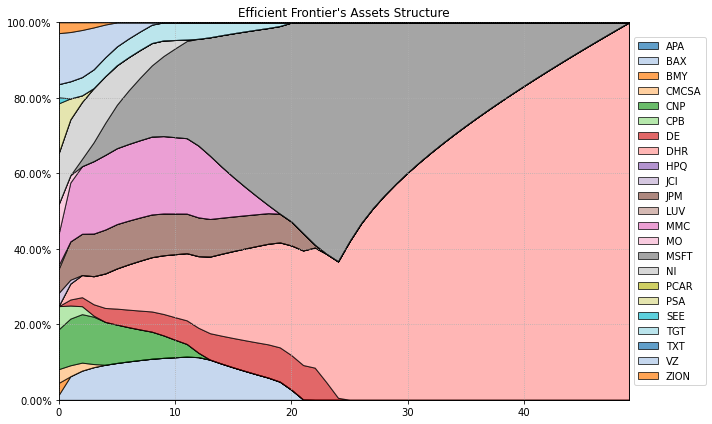

In [8]:
# Plotting efficient frontier composition

ax = plf.plot_frontier_area(w_frontier=frontier, cmap="tab20", height=6, width=10, ax=None)

## 3. Estimating Portfolios Using Risk Factors with Other Risk Measures and PCR

In this part I will calculate optimal portfolios for several risk measures using a __mean estimate based on PCR__. I will find the portfolios that maximize the risk adjusted return for all available risk measures.

### 3.1 Calculate Optimal Portfolios for Several Risk Measures.

I will mantain the constraints on risk factors.

In [9]:
# Risk Measures available:
#
# 'MV': Standard Deviation.
# 'MAD': Mean Absolute Deviation.
# 'MSV': Semi Standard Deviation.
# 'FLPM': First Lower Partial Moment (Omega Ratio).
# 'SLPM': Second Lower Partial Moment (Sortino Ratio).
# 'CVaR': Conditional Value at Risk.
# 'EVaR': Entropic Value at Risk.
# 'WR': Worst Realization (Minimax)
# 'MDD': Maximum Drawdown of uncompounded returns (Calmar Ratio).
# 'ADD': Average Drawdown of uncompounded returns.
# 'CDaR': Conditional Drawdown at Risk of uncompounded returns.
# 'UCI': Ulcer Index of uncompounded returns.

rms = ['MV', 'MAD', 'MSV', 'FLPM', 'SLPM', 'CVaR',
       'EVaR', 'WR', 'MDD', 'ADD', 'CDaR', 'UCI']

w_s = pd.DataFrame([])

# When we use hist = True the risk measures all calculated
# using historical returns, while when hist = False the
# risk measures are calculated using the expected returns 
#  based on risk factor model: R = a + B * F

hist = False

for i in rms:
    w = port.optimization(model=model, rm=i, obj=obj, rf=rf, l=l, hist=hist)
    w_s = pd.concat([w_s, w], axis=1)
    
w_s.columns = rms

In [10]:
w_s.style.format("{:.2%}").background_gradient(cmap='YlGn')

,MV,MAD,MSV,FLPM,SLPM,CVaR,EVaR,WR,MDD,ADD,CDaR,UCI
APA,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%
BAX,10.02%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%
BMY,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%
CMCSA,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%
CNP,9.47%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%
CPB,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%
DE,4.50%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%
DHR,11.50%,96.66%,100.00%,97.80%,100.00%,100.00%,100.00%,100.00%,100.00%,98.32%,100.00%,100.00%
HPQ,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%
JCI,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%


<AxesSubplot:>

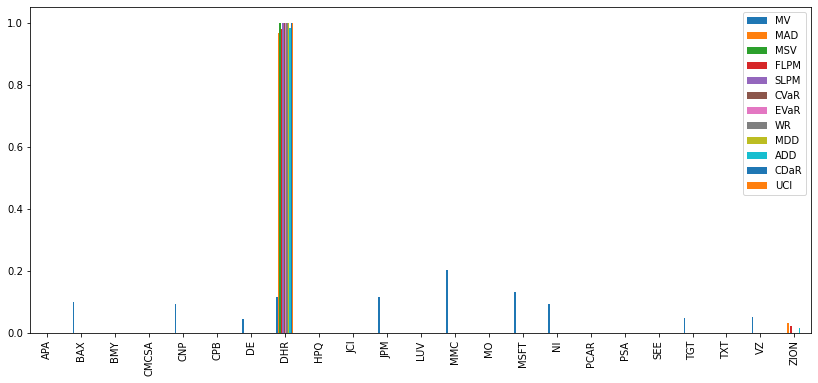

In [11]:
import matplotlib.pyplot as plt

# Plotting a comparison of assets weights for each portfolio

fig = plt.gcf()
fig.set_figwidth(14)
fig.set_figheight(6)
ax = fig.subplots(nrows=1, ncols=1)

w_s.plot.bar(ax=ax)

In [12]:
w_s = pd.DataFrame([])

# When we use hist = True the risk measures all calculated
# using historical returns, while when hist = False the
# risk measures are calculated using the expected returns 
# based on risk factor model: R = a + B * F

hist = True

for i in rms:
    w = port.optimization(model=model, rm=i, obj=obj, rf=rf, l=l, hist=hist)
    w_s = pd.concat([w_s, w], axis=1)
    
w_s.columns = rms

In [13]:
w_s.style.format("{:.2%}").background_gradient(cmap='YlGn')

,MV,MAD,MSV,FLPM,SLPM,CVaR,EVaR,WR,MDD,ADD,CDaR,UCI
APA,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%
BAX,8.80%,3.66%,0.00%,1.19%,0.00%,0.00%,0.00%,0.00%,0.00%,0.55%,0.00%,0.00%
BMY,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%
CMCSA,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%
CNP,8.92%,4.57%,7.23%,6.93%,7.48%,9.76%,1.43%,0.00%,27.32%,12.53%,13.94%,9.99%
CPB,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,14.34%,0.00%,0.00%,0.00%,0.00%
DE,4.36%,1.54%,0.00%,0.34%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.14%
DHR,11.84%,41.38%,54.23%,46.13%,55.20%,53.58%,53.16%,15.28%,72.68%,22.57%,34.03%,30.60%
HPQ,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%
JCI,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%


<AxesSubplot:>

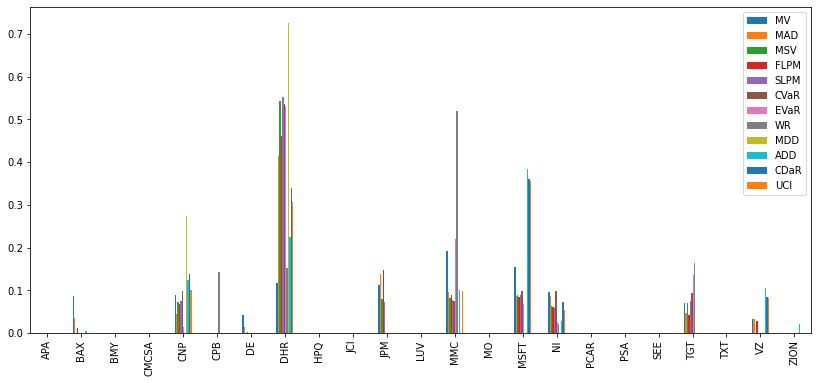

In [14]:
import matplotlib.pyplot as plt

# Plotting a comparison of assets weights for each portfolio

fig = plt.gcf()
fig.set_figwidth(14)
fig.set_figheight(6)
ax = fig.subplots(nrows=1, ncols=1)

w_s.plot.bar(ax=ax)